# Analize Decision Tree models

This notebook is responsible for taking valueble insights of the different Decision Tree models

### Import Statements

In [18]:
import pandas as pd
import os
import sys
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
p = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..'))
sys.path.append(p)
file_path = os.path.join(p, 'datasets', 'new_decision_tree_data.csv')
data = pd.read_csv(file_path)
data

,ID3_Pred,Ruleset_Pred,Bagging_Pred,Actual
0,3,3,3,3
1,6,3,3,6
2,2,2,2,2
3,3,3,3,3
4,4,4,4,4
...,...,...,...,...
9001,3,3,3,3
9002,4,2,4,4
9003,6,6,3,6
9004,5,3,3,5


In [20]:
def generate_metrics(y_pred, y_true):
    """
    Generate metrics for the given predictions and true labels.
    """

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted')

    return accuracy, precision, recall, f1



In [21]:
def plot_confusion_matrix(y_pred, y_true, col):
       
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {col}')
    plt.show()
    

Metrics for ID3 Tree model:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000


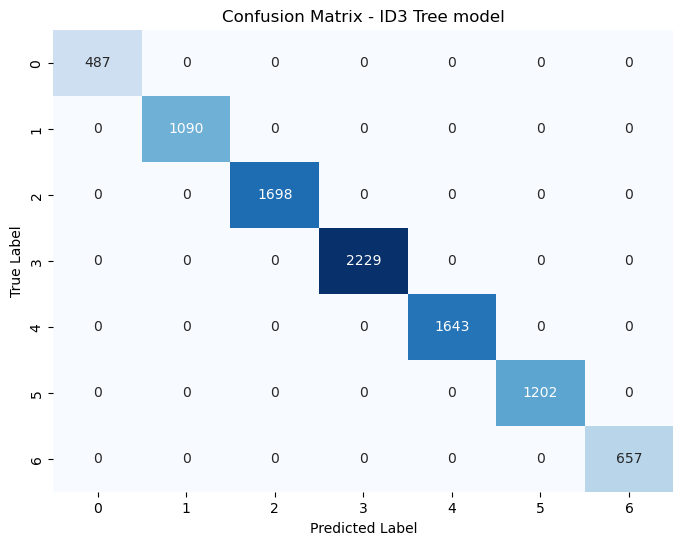

Metrics for Ruleset Tree model:
Accuracy: 0.6493, Precision: 0.6469, Recall: 0.6493, F1 Score: 0.6456


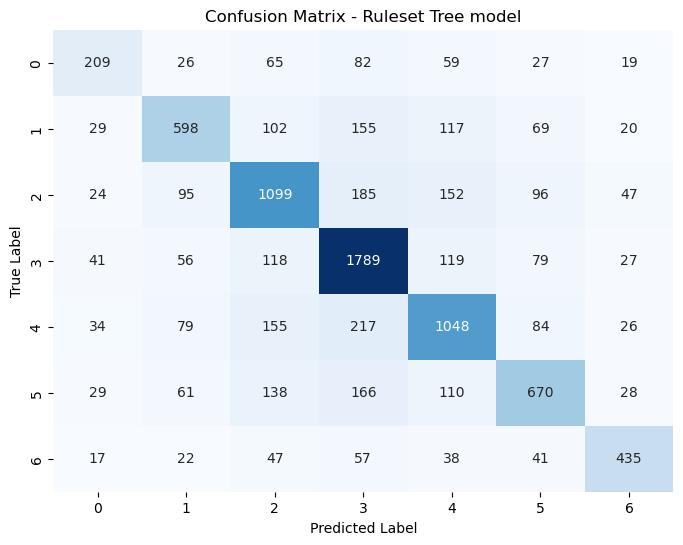

Metrics for Bagging Tree model:
Accuracy: 0.7719, Precision: 0.7933, Recall: 0.7719, F1 Score: 0.7501


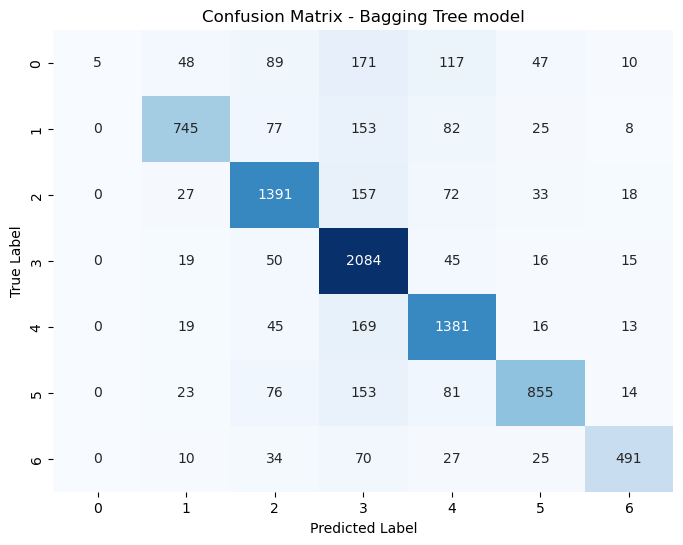

In [22]:
for col in data.columns[:-1]:
    y_pred = data[col]
    y_true = data['Actual']

    
    y_true = y_true[y_pred != -1]
    y_pred = y_pred[y_pred != -1]
   
    accuracy, precision, recall, f1 = generate_metrics(y_pred, y_true)
    print(f"Metrics for {col.split('_')[0]} Tree model:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    plot_confusion_matrix(y_pred, y_true, col.split('_')[0] + ' Tree model')